In [93]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

In [94]:
tf.__version__


'2.0.0'

mnist_dataset = keras.datasets.fashion_mnist

In [95]:
mnist_dataset = keras.datasets.fashion_mnist

In [96]:
(train_images, train_labels),(test_images, test_labels) = mnist_dataset.load_data()

In [97]:
train_images.shape
test_images.shape

(10000, 28, 28)

In [98]:
test_images.shape


(10000, 28, 28)

In [99]:
test_images = np.expand_dims(test_images, 3)
train_images = np.expand_dims(train_images, 3)

In [100]:
test_images.shape

(10000, 28, 28, 1)

In [101]:
test_labels.shape

(10000,)

In [102]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [103]:
test_images = test_images/255.0
train_images= train_images/255.0

In [104]:
# model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
#                          keras.layers.Dense(128, activation="relu"),
#                          keras.layers.Dense(10, activation="softmax")])

In [105]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [106]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [107]:
history = model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 321us/sample - loss: 0.4320 - accuracy: 0.8407
Epoch 2/20
60000/60000 [==============================] - 19s 312us/sample - loss: 0.2844 - accuracy: 0.8947
Epoch 3/20
60000/60000 [==============================] - 19s 312us/sample - loss: 0.2375 - accuracy: 0.9119
Epoch 4/20
60000/60000 [==============================] - 19s 314us/sample - loss: 0.2015 - accuracy: 0.9251
Epoch 5/20
60000/60000 [==============================] - 19s 312us/sample - loss: 0.1730 - accuracy: 0.9345
Epoch 6/20
60000/60000 [==============================] - 19s 311us/sample - loss: 0.1503 - accuracy: 0.9437
Epoch 7/20
60000/60000 [==============================] - 19s 311us/sample - loss: 0.1271 - accuracy: 0.9520
Epoch 8/20
60000/60000 [==============================] - 19s 312us/sample - loss: 0.1069 - accuracy: 0.9598
Epoch 9/20
60000/60000 [==============================] - 19s 311us/sample - loss: 0.0954 - accuracy: 0.9

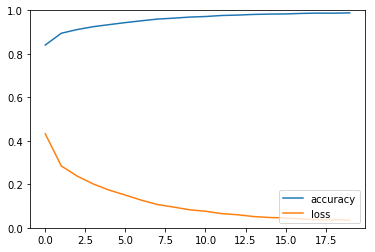

In [108]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["loss"], label="loss")
plt.xlabel = "Epoch"
plt.ylabel = "Accuracy"
plt.ylim([0.0, 1])
plt.legend(loc='lower right')



In [109]:
history.history

{'loss': [0.4319558552602927,
  0.2844185014684995,
  0.23748964050312837,
  0.20147591104209422,
  0.17299237913191318,
  0.15031543008461595,
  0.12705500064557418,
  0.10693114098751297,
  0.09540244377733519,
  0.0828975522880132,
  0.0761209798021863,
  0.06523721389540782,
  0.060146402251783485,
  0.05174284018270167,
  0.04735399340078002,
  0.04546762416623921,
  0.04033511537305912,
  0.036488824875958135,
  0.03727886552076482,
  0.03576126067093883],
 'accuracy': [0.84068334,
  0.8947333,
  0.9119,
  0.92505,
  0.93448335,
  0.94373333,
  0.952,
  0.9597833,
  0.9640667,
  0.9690167,
  0.97165,
  0.97635,
  0.97828335,
  0.9812667,
  0.9828333,
  0.9836,
  0.98595,
  0.98735,
  0.98696667,
  0.9885]}

In [110]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


10000/1 - 1s - loss: 0.3356 - accuracy: 0.9096


In [111]:
import numpy as np
pred = model.predict(test_images)

In [112]:
pred.shape

(10000, 10)

In [113]:
pred[10]


array([3.70772758e-17, 6.37726540e-17, 1.81824892e-13, 1.14423505e-11,
       9.99999166e-01, 2.94615878e-27, 8.63181640e-07, 7.27399549e-37,
       1.11317162e-11, 2.82381967e-27], dtype=float32)

In [114]:
np.argmax(pred[10])

4

In [115]:
test_labels[10]

4

In [116]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1601000   
_________________________________________________________________
dense_12 (Dense)             (None, 400)              

In [117]:
keras.optimizers.Adam?